# Guía para el análisis de series temporales en Python
El análisis de series temporales es una tarea común para los científicos de datos. Esta guía le introducirá en sus conceptos clave en Python.

En todos los sectores, las organizaciones utilizan habitualmente en sus operaciones datos de series temporales, es decir, cualquier información recopilada a lo largo de un intervalo de tiempo regular. Algunos ejemplos son los precios diarios de las acciones, las tasas de consumo de energía, las métricas de participación en las redes sociales y la demanda minorista, entre otros. El análisis de los datos de series temporales proporciona información sobre tendencias, patrones estacionales y previsiones de acontecimientos futuros que pueden ayudar a generar beneficios. Por ejemplo, al conocer las tendencias estacionales de la demanda de productos minoristas, las empresas pueden planificar promociones para maximizar las ventas a lo largo del año.

Al analizar datos de series temporales, hay que seguir una serie de pasos. En primer lugar, hay que comprobar la estacionariedad y la autocorrelación. La estacionariedad es una forma de medir si los datos tienen patrones estructurales, como tendencias estacionales. La autocorrelación se produce cuando los valores futuros de una serie temporal dependen linealmente de los valores pasados. Es necesario comprobar la existencia de ambos fenómenos en los datos de series temporales porque son suposiciones de muchos métodos ampliamente utilizados en el análisis de series temporales. Por ejemplo, el método de la media móvil autorregresiva integrada (ARIMA) para predecir series temporales presupone estacionariedad. Además, la regresión lineal para la previsión de series temporales supone que los datos no tienen autocorrelación. Por tanto, antes de llevar a cabo estos procesos, es necesario saber si los datos son viables para el análisis.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*3nRjq-BbTJkf0EchAUih8w.png)

Durante un análisis de series temporales en Python, también es necesario realizar la descomposición de tendencias y pronosticar valores futuros. La descomposición le permite visualizar las tendencias en sus datos, lo que es una gran manera de explicar claramente su comportamiento. Por último, la previsión permite anticipar eventos futuros que pueden ayudar en la toma de decisiones. Se pueden utilizar muchas técnicas diferentes para la previsión de series temporales, pero aquí hablaremos de la media móvil autorregresiva integrada (ARIMA).

Trabajaremos con datos de series temporales de pasajeros de líneas aéreas disponibles públicamente, que se pueden encontrar aquí.

## Lectura y visualización de datos
Para empezar, vamos a importar la biblioteca Pandas y leer los datos de pasajeros de la aerolínea en un marco de datos:

In [1]:
import pandas as pd 
df = pd.read_csv("AirPassengers.csv")

Ahora, vamos a mostrar las cinco primeras filas de datos utilizando el método head() del marco de datos:

In [2]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Podemos ver que los datos contienen una columna denominada "Mes" que contiene fechas. En esa columna, las fechas están formateadas como año-mes. También vemos que los datos comienzan en el año 1949.

La segunda columna se llama "#Pasajeros" y contiene el número de pasajeros del año-mes. Veamos los cinco últimos registros de los datos utilizando el método tail():

In [3]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


Vemos en este proceso que los datos terminan en 1960.

Lo siguiente que queremos hacer es convertir la columna del mes en un objeto datetime. Esto permitirá extraer programáticamente valores temporales como el año o el mes para cada registro. Para ello, utilizamos el método Pandas to_datetime():

In [4]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Observe que este proceso inserta automáticamente el primer día de cada mes, que es básicamente un valor ficticio ya que no tenemos datos diarios de pasajeros.

Lo siguiente que podemos hacer es convertir la columna del mes en un índice. Esto nos permitirá trabajar más fácilmente con algunos de los paquetes que veremos más adelante:

In [5]:
df.index = df['Month']
del df['Month']
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


A continuación, vamos a generar un gráfico de series temporales utilizando Seaborn y Matplotlib. Esto nos permitirá visualizar los datos de la serie temporal. En primer lugar, vamos a importar Matplotlib y Seaborn:

Text(0, 0.5, 'Number of Passengers')

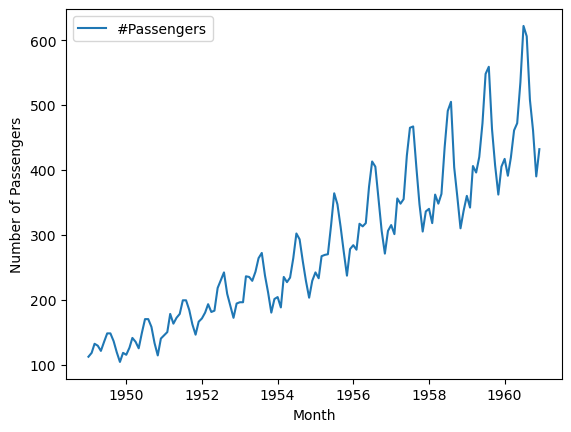

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.lineplot(df)
plt.ylabel('Number of Passengers')

## Estacionariedad
La estacionariedad es una parte fundamental del análisis de series temporales. En pocas palabras, la estacionariedad significa que la forma en que cambian los datos de las series temporales es constante. Una serie temporal estacionaria no tendrá tendencias ni patrones estacionales. Debe comprobar la estacionariedad porque no sólo facilita el modelado de series temporales, sino que es un supuesto subyacente en muchos métodos de series temporales. En concreto, la estacionariedad se presupone en una gran variedad de métodos de previsión de series temporales, como la media móvil autorregresiva (ARMA), el ARIMA y el ARIMA estacional (SARIMA).

Utilizaremos la prueba de Dickey Fuller para comprobar la estacionariedad de nuestros datos. Esta prueba generará valores críticos y un valor p, que nos permitirán aceptar o rechazar la hipótesis nula de que no hay estacionariedad. Si rechazamos la hipótesis nula, significa que aceptamos la alternativa, que afirma que existe estacionariedad.

Estos valores nos permiten comprobar el grado en que los valores actuales cambian con los valores pasados. Si no hay estacionariedad en el conjunto de datos, un cambio en los valores actuales no provocará un cambio significativo en los valores pasados.

Comprobemos la estacionariedad en los datos de pasajeros de avión. Para empezar, calculemos una media móvil de siete meses:

In [7]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

In [8]:
print(rolling_mean)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   500.857143
1960-09-01   517.571429
1960-10-01   523.571429
1960-11-01   513.428571
1960-12-01   507.714286

[144 rows x 1 columns]


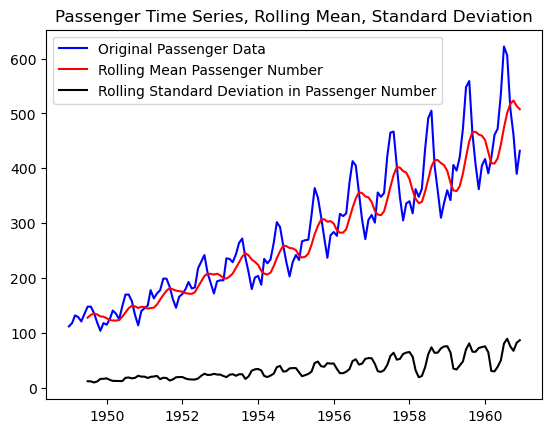

In [9]:
#Next, let’s overlay our time series with the seven-month rolling mean and seven-month rolling standard deviation. First, let’s make a Matplotlib plot of our time series:
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

A continuación, vamos a importar la **prueba Dickey-Fuller** aumentada del paquete statsmodels. La documentación de la prueba se puede encontrar aquí.

A continuación, pasemos nuestro marco de datos al método adfuller. Aquí, especificamos el parámetro autolag como "AIC", lo que significa que el retraso se elige para minimizar el criterio de información:

In [10]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df,autolag="AIC")
#Next, let’s store our results in a data frame display it:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , 
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                    "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
output_df

,Values,Metric
0,0.815369,Test Statistics
1,0.991880,p-value
2,13.000000,No. of lags used
3,130.000000,Number of observations used
4,-3.481682,critical value (1%)
5,-2.884042,critical value (5%)
6,-2.578770,critical value (10%)


Podemos ver que nuestros datos no son estacionarios por el hecho de que nuestro valor p es superior al 5 por ciento y el estadístico de prueba es superior al valor crítico. También podemos extraer estas conclusiones de la inspección de los datos, ya que vemos una tendencia clara y creciente en el número de pasajeros.

## Autocorrelación
Comprobar la autocorrelación de los datos de series temporales en Python es otra parte importante del proceso analítico. Se trata de una medida del grado de correlación de los datos de series temporales en un momento dado con los valores pasados, lo que tiene enormes implicaciones en muchos sectores. Por ejemplo, si nuestros datos de pasajeros tienen una fuerte autocorrelación, podemos asumir que un alto número de pasajeros hoy sugiere una fuerte probabilidad de que también sea alto mañana.

El marco de datos de Pandas tiene un método de autocorrelación que podemos utilizar para calcular la autocorrelación en nuestros datos de pasajeros. Hagámoslo para un desfase de un mes:

In [11]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

# Now, let’s try three, six and nine months:
autocorrelation_lag3 = df['#Passengers'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['#Passengers'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.9601946480498523
Three Month Lag:  0.837394765081794
Six Month Lag:  0.7839187959206183
Nine Month Lag:  0.8278519011167601


Vemos que, incluso con un desfase de nueve meses, los datos están muy autocorrelacionados. Esto ilustra mejor las tendencias a corto y largo plazo de los datos.

## Descomposición
La descomposición de tendencias es otra forma útil de visualizar las tendencias en los datos de series temporales. Para proceder, vamos a importar seasonal_decompose del paquete statsmodels:

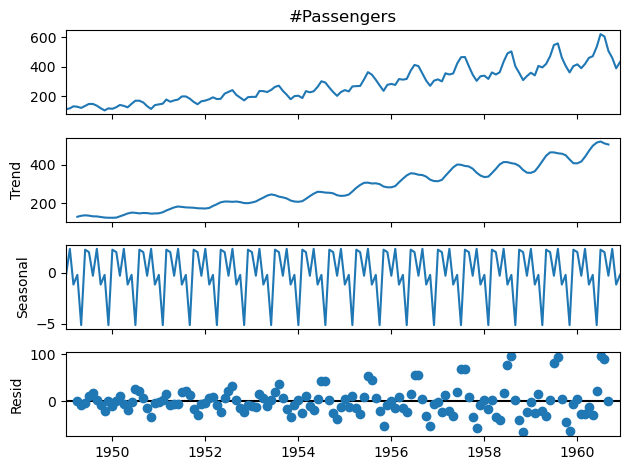

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
#Next, let’s pass our data frame into the seasonal_decompose method and plot the result:

decompose = seasonal_decompose(df['#Passengers'],model='additive', period=7)
decompose.plot()
plt.show()

En este gráfico se aprecia claramente la tendencia al alza del número de pasajeros y los patrones de estacionalidad en la subida y bajada de los valores cada año.

## Predicción
La previsión de series temporales nos permite predecir valores futuros de una serie temporal a partir de datos actuales y pasados. En este caso, utilizaremos el método ARIMA para predecir el número de pasajeros, que nos permite predecir valores futuros en términos de una combinación lineal de valores pasados. Utilizaremos el paquete auto_arima, que nos permitirá prescindir del largo proceso de ajuste de hiperparámetros.

En primer lugar, dividamos nuestros datos para entrenamiento y prueba y visualicemos la división:

/tmp/ipykernel_108475/1918306879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['#Passengers']
/tmp/ipykernel_108475/1918306879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['#Passengers']


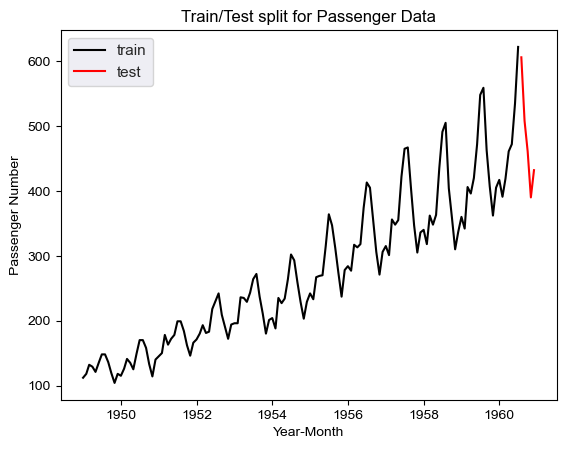

In [13]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("1960-08", format='%Y-%m')]
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']
test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color = "black", label="train")
plt.plot(test, color = "red", label="test")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.legend()
plt.show()

La línea negra corresponde a nuestros datos de entrenamiento y la roja a nuestros datos de prueba.

## Los modelos ARIMA

Los modelos ARIMA ofrecen otro enfoque de la previsión de series temporales. El alisamiento exponencial y los modelos ARIMA son los dos enfoques más utilizados para la previsión de series temporales, y proporcionan enfoques complementarios del problema. Mientras que los modelos de suavizado exponencial se basan en una descripción de la tendencia y la estacionalidad de los datos, los modelos ARIMA pretenden describir las autocorrelaciones de los datos.

![](https://mlpills.dev/wp-content/uploads/2023/01/CodeCogsEqn-4_notes_2.png)

Antes de presentar los modelos ARIMA, debemos analizar el concepto de estacionariedad y la técnica de diferenciación de las series temporales.

Importemos auto_arima del paquete pdmarima, entrenemos nuestro modelo y generemos predicciones:

En los modelos ARIMA (Autoregressive Integrated Moving Average) y SARIMA (Seasonal Autoregressive Integrated Moving Average), los parámetros p, q y d son componentes esenciales que determinan la estructura del modelo y cómo se modelan las relaciones entre las observaciones de una serie temporal.

### p (orden del componente AR - Autoregressive):
El parámetro p representa el número de términos de autoregresión (AR) que se incluyen en el modelo. El término AR representa la relación entre una observación actual y sus valores pasados. Si p es igual a 1, el modelo utiliza solo la observación más reciente para predecir la siguiente. Si p es mayor que 1, se utilizan múltiples observaciones pasadas para la predicción.

### q (orden del componente MA - Moving Average):
El parámetro q representa el número de términos de media móvil (MA) que se incluyen en el modelo. El término MA representa la relación entre una observación actual y los errores pasados del modelo. Si q es igual a 1, el modelo utiliza solo el error más reciente para predecir la siguiente. Si q es mayor que 1, se utilizan múltiples errores pasados para la predicción.

### d (grado de diferencia - Diferenciación):
El parámetro d representa el número de veces que se ha aplicado la diferenciación para hacer estacionaria una serie temporal. La diferenciación implica restar la observación actual de una observación pasada para reducir o eliminar la tendencia temporal presente en la serie. Si d es igual a 0, no se requiere diferenciación, lo que significa que la serie ya es estacionaria. Si d es mayor que 0, indica cuántas veces se ha aplicado la diferenciación para hacer que la serie sea estacionaria.

Para el modelo SARIMA, se agregan tres parámetros adicionales para modelar la estacionalidad:

### P (orden del componente AR estacional):
Representa el número de términos de autoregresión estacional que se incluyen en el modelo.

### Q (orden del componente MA estacional):
Representa el número de términos de media móvil estacional que se incluyen en el modelo.

### D (grado de diferencia estacional):
Representa el número de veces que se ha aplicado la diferenciación estacional para hacer estacionaria la componente estacional de la serie.

Los parámetros p, d y q se determinan utilizando técnicas como el análisis de autocorrelación y el análisis de autocorrelación parcial para identificar las estructuras ARIMA o SARIMA más adecuadas para modelar una serie temporal particular. Estos modelos son muy útiles para predecir y analizar datos de series temporales con patrones complejos.

In [14]:
!pip3 install pmdarima --break-system-packages
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Defaulting to user installation because normal site-packages is not writeable
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             

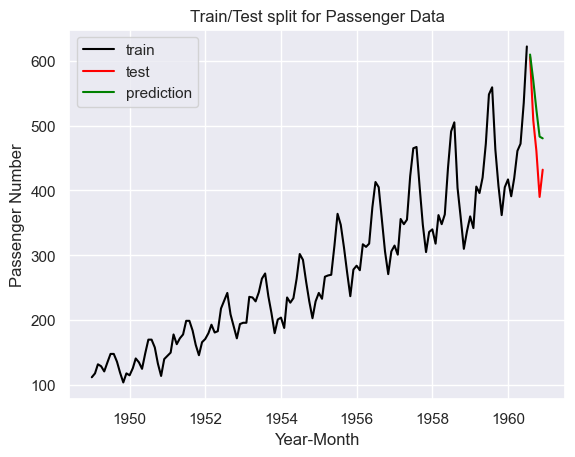

In [15]:
plt.plot(train, color = "black", label="train")
plt.plot(test, color = "red", label="test")
plt.plot(forecast, color = "green", label="prediction")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.legend()
plt.show()

In [16]:
#Finally, let’s calculate root mean squared error (RMSE):
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  61.36666989279708


In [17]:
# otro modo....
from statsmodels.tsa.arima.model import ARIMA
 
model = ARIMA(train, order=(4,1,3))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  train   No. Observations:                  139
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -649.525
Date:                Mon, 07 Aug 2023   AIC                           1315.051
Time:                        07:01:46   BIC                           1338.469
Sample:                    01-01-1949   HQIC                          1324.568
                         - 07-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5191      0.147     -3.528      0.000      -0.808      -0.231
ar.L2          0.5533      0.139      3.984      0.000       0.281       0.826
ar.L3          0.1309      0.143      0.914      0.361      -0.150       0.412
ar.L4         -0.4727      0.091     -5.210      0.000      -0.650      -0.295
ma.L1          0.8935      0.121      7.367      0.000       0.656       1.131
ma.L2         -0.5950      0.185     -3.216      0.001      -0.958      -0.232
ma.L3         -0.6932      0.143     -4.843      0.000      -0.974      -0.413
sigma2       707.4361     85.535      8.271      0.000     539.790     875.082
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                10.86
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               5.26   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
test

,test
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [19]:
forecast

,Prediction
Month,
1960-08-01,609.538090
1960-09-01,569.574414
1960-10-01,524.519592
1960-11-01,483.044472
1960-12-01,480.305299


In [20]:
train.tail()

,train
Month,
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622


In [21]:
622*(-0.5191)+535*(0.5533)+472*(0.1309)+461*(-0.4727)+707.4361

524.4415

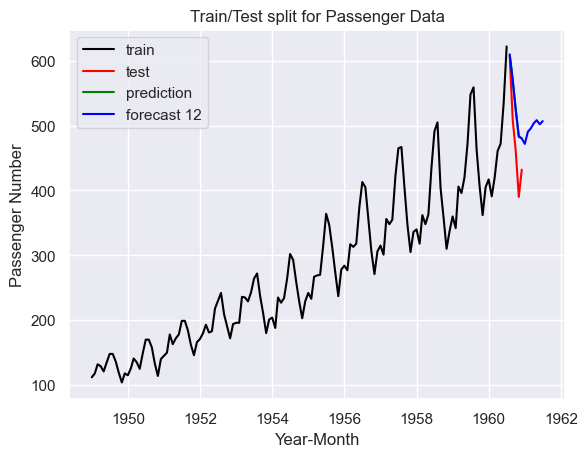

In [22]:
plt.plot(train, color = "black", label="train")
plt.plot(test, color = "red", label="test")
plt.plot(forecast, color = "green", label="prediction")
plt.plot(model_fit.forecast(12), color="blue", label="forecast 12")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.legend()
plt.show()